In [1]:
import os
import numpy as np
import pandas as pd
dataframe = pd.read_csv( '/home/yupaporn/codes/USAI/FVtrain_5FP_fold6_1.csv') #เปลี่ยนไฟล์
dataframe = dataframe.drop(['Unnamed: 0'], axis=1)
dataframe

,0,1,2,3,4,5,6,7,8,9,...,2042,2043,2044,2045,2046,2047,Class,SubPosition,Views,Sub_class
0,0.364294,0.100958,-0.141095,0.008378,0.197379,-0.003850,-0.163205,0.283486,-0.120220,0.428233,...,0.377151,1.067846,0.699513,-0.109622,0.265392,0.788433,Abnormal,P31,FP-B,AB01
1,0.117332,0.206312,0.072082,-0.124712,0.373150,-0.047873,0.689254,0.416436,-0.104231,0.352352,...,-0.067163,0.475113,0.304593,-0.125455,-0.142197,0.372518,Abnormal,P1,FP-A,AB01
2,-0.092090,-0.112679,-0.137555,-0.125217,0.211316,-0.166280,0.577107,0.025931,-0.146537,-0.008648,...,-0.170188,0.056256,-0.028722,-0.121274,-0.189222,0.195729,Abnormal,P2,FP-A,AB01
3,-0.056883,-0.137370,-0.065180,0.048629,0.233246,0.130619,-0.207292,0.776245,0.119973,-0.022267,...,-0.053838,0.447754,0.430569,-0.038273,0.413446,0.417263,Abnormal,P42,FP-B,AB01
4,0.612515,0.137323,-0.140400,0.031721,0.573213,0.200964,-0.153633,0.962362,0.086050,0.814025,...,0.111319,1.048282,1.179006,-0.114935,0.528234,0.912156,Abnormal,P41,FP-B,AB01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4594,0.588413,-0.033786,-0.194639,-0.088500,-0.029469,-0.164584,-0.211117,0.391163,-0.162890,0.636100,...,-0.063470,0.604752,0.851983,-0.151965,-0.007454,0.566837,Normal,P32,FP-B,Normal
4595,0.117491,-0.037146,-0.160026,-0.087072,0.348644,0.078493,-0.194041,0.762906,0.247675,0.383848,...,0.181548,0.471561,0.926297,-0.114032,0.485462,0.566014,Normal,P42,FP-B,Normal
4596,-0.184211,-0.178187,0.182524,0.152978,-0.195437,-0.187907,-0.164389,0.027783,0.856146,-0.227562,...,-0.162945,-0.167645,-0.185876,0.800626,0.573581,-0.166318,Normal,P52,FP-C,Normal
4597,-0.189938,-0.111346,-0.058149,0.334833,0.057391,-0.154338,-0.117801,0.284321,0.823372,-0.058138,...,-0.068496,-0.118340,-0.145341,0.745258,0.703724,-0.134604,Normal,P61,FP-C,Normal


In [2]:
X = dataframe.iloc[:,0:2048]
y = dataframe.iloc[:,2050]
print(X.shape)
print(y.shape)

(4599, 2048)
(4599,)


In [3]:
y[0]

'FP-B'

# Random Forest

In [4]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import BaggingClassifier

In [5]:
n_estimators = [400]
max_depth = [5, 8, 15, 25, 30]
min_samples_split = [2, 5, 10, 15, 100] 

forest = RandomForestClassifier(random_state = 1)


hyperF ={'n_estimators' : n_estimators, 'max_depth' : max_depth, 'min_samples_split' : min_samples_split}
# hyperF ={'max_depth' : max_depth, 'min_samples_split' : min_samples_split}

gridF = GridSearchCV(forest, hyperF, cv = 10, verbose = 1, n_jobs = -1)
bestF = gridF.fit(X, y)

Fitting 10 folds for each of 25 candidates, totalling 250 fits


In [6]:
# view the results as a pandas DataFrame
import pandas as pd
pd.DataFrame(bestF.cv_results_)[['mean_test_score', 'std_test_score', 'params']]

,mean_test_score,std_test_score,params
0,0.988260,0.018806,"{'max_depth': 5, 'min_samples_split': 2, 'n_es..."
1,0.988478,0.018803,"{'max_depth': 5, 'min_samples_split': 5, 'n_es..."
2,0.988260,0.018731,"{'max_depth': 5, 'min_samples_split': 10, 'n_e..."
3,0.988260,0.018731,"{'max_depth': 5, 'min_samples_split': 15, 'n_e..."
4,0.988043,0.018757,"{'max_depth': 5, 'min_samples_split': 100, 'n_..."
5,0.987826,0.018655,"{'max_depth': 8, 'min_samples_split': 2, 'n_es..."
6,0.988043,0.018681,"{'max_depth': 8, 'min_samples_split': 5, 'n_es..."
7,0.988043,0.018732,"{'max_depth': 8, 'min_samples_split': 10, 'n_e..."
8,0.988695,0.018846,"{'max_depth': 8, 'min_samples_split': 15, 'n_e..."
9,0.988260,0.018756,"{'max_depth': 8, 'min_samples_split': 100, 'n_..."


In [7]:
# examine the first result
print("**examine the first result","\n")

print(bestF.cv_results_['params'][0])
print(bestF.cv_results_['mean_test_score'][0])

# print the array of mean scores only
print("\n","**print the array of mean scores only","\n")

grid_mean_scores = bestF.cv_results_['mean_test_score']
print(grid_mean_scores)

# examine the best model
print("\n","**examine the best model","\n")

print(bestF.best_score_)
print(bestF.best_params_)
print(bestF.best_estimator_)

**examine the first result 

{'max_depth': 5, 'min_samples_split': 2, 'n_estimators': 400}
0.988260395945818

 **print the array of mean scores only 

[0.9882604  0.98847779 0.9882604  0.9882604  0.988043   0.98782561
 0.988043   0.988043   0.98869518 0.9882604  0.98760822 0.98782561
 0.98782561 0.9882604  0.9882604  0.98760822 0.98782561 0.98760822
 0.9882604  0.9882604  0.98760822 0.98782561 0.98760822 0.9882604
 0.9882604 ]

 **examine the best model 

0.9886951785545136
{'max_depth': 8, 'min_samples_split': 15, 'n_estimators': 400}
RandomForestClassifier(max_depth=8, min_samples_split=15, n_estimators=400,
                       random_state=1)


In [8]:
#Print the tured parameters and score
print("Tuned Decision Tree Parameters: {}".format(bestF.best_params_))
print("Best score is {}".format(bestF.best_score_))

Tuned Decision Tree Parameters: {'max_depth': 8, 'min_samples_split': 15, 'n_estimators': 400}
Best score is 0.9886951785545136


# setting parameters

In [9]:
forestOpt = RandomForestClassifier(random_state = 1, max_depth = 8, n_estimators = 400, min_samples_split = 15) #เปลี่ยนตาม cell 8
             
modelOpt = forestOpt.fit(X, y)# 

In [10]:
dataframe = pd.read_csv( '/home/yupaporn/codes/USAI/FVvalidation_5FP_RF_5FP_fold6_1.csv') #เปลี่ยนชื่อไฟล์ Validation

In [11]:
dataframe

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,2042,2043,2044,2045,2046,2047,Class,SubPosition,Views,Sub_class
0,0,0.088111,0.084979,-0.159341,-0.121146,0.108318,0.055693,-0.206385,0.670532,0.161083,...,-0.006836,0.428255,0.634549,-0.079291,0.253597,0.368813,Abnormal,P42,FP-B,AB01
1,1,-0.036043,0.176504,0.406563,-0.057735,0.059977,0.076648,0.514208,0.203904,-0.197568,...,-0.092788,0.047489,0.043831,-0.124892,-0.151274,0.160443,Abnormal,P2,FP-A,AB01
2,2,-0.201366,-0.125678,-0.081618,0.060315,-0.203556,-0.190703,-0.189451,-0.046204,0.128575,...,-0.211645,-0.222409,-0.213920,0.206031,-0.049139,-0.162657,Abnormal,P51,FP-C,AB01
3,3,0.229069,0.040427,-0.096845,0.212402,0.290006,-0.223279,0.664260,0.584298,-0.120318,...,-0.117410,0.065853,0.108393,-0.093355,-0.220048,0.243307,Abnormal,P1,FP-A,AB01
4,4,0.098194,-0.125541,-0.193168,-0.103063,0.069133,-0.095026,-0.110996,0.384701,-0.191665,...,-0.142851,0.520026,0.513894,0.154666,0.113198,0.568250,Abnormal,P41,FP-B,AB01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
653,653,0.135335,-0.133799,-0.121256,-0.070816,0.102646,-0.168273,-0.107410,0.416860,-0.037102,...,-0.189302,0.464991,0.726382,-0.010262,0.267716,0.228705,Normal,P32,FP-B,Normal
654,654,-0.008360,-0.063737,-0.107836,0.031093,0.314323,-0.106467,-0.205384,0.576752,-0.048196,...,0.005061,0.131541,0.319574,-0.147122,0.105844,0.376450,Normal,P42,FP-B,Normal
655,655,-0.173923,0.044043,0.087345,0.198223,-0.221117,-0.159845,-0.013978,-0.045500,0.718877,...,0.099829,-0.169990,-0.175388,0.639044,0.319324,-0.158037,Normal,P52,FP-C,Normal
656,656,-0.214644,0.075535,-0.006698,-0.053203,-0.189083,-0.182044,-0.178347,0.151136,0.400567,...,-0.182873,-0.118322,-0.210180,0.482659,0.413239,-0.157191,Normal,P61,FP-C,Normal


In [12]:
X_test = dataframe.iloc[:,1:2049]
y_test = dataframe.iloc[:,2051]
print(X_test.shape)
print(y_test.shape)

(658, 2048)
(658,)


In [13]:
y_test

0      FP-B
1      FP-A
2      FP-C
3      FP-A
4      FP-B
       ... 
653    FP-B
654    FP-B
655    FP-C
656    FP-C
657    FP-E
Name: Views, Length: 658, dtype: object

In [14]:
y_pred = modelOpt.predict(X_test)

In [15]:
#Marking the Confusion Matrix
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))#performance

[[120  10   3   0   2]
 [  4 183   9   0   5]
 [  0   4 178   6   0]
 [  0   0   4  95   0]
 [  0   4   0   0  31]]
              precision    recall  f1-score   support

        FP-A       0.97      0.89      0.93       135
        FP-B       0.91      0.91      0.91       201
        FP-C       0.92      0.95      0.93       188
        FP-D       0.94      0.96      0.95        99
        FP-E       0.82      0.89      0.85        35

    accuracy                           0.92       658
   macro avg       0.91      0.92      0.91       658
weighted avg       0.92      0.92      0.92       658



Text(0.5, 21.5, 'Predicted label')

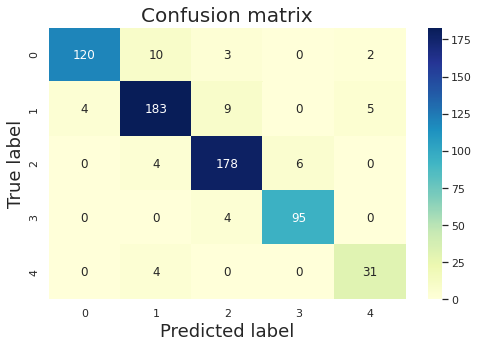

In [16]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test, y_pred)

import seaborn as sns
sns.set()
fig, ax = plt.subplots(figsize=(8, 5))

ax = sns.heatmap(cm, annot=True, fmt="d", cmap="YlGnBu") #Blues,Oranges,Reds
ax.set_title('Confusion matrix',fontsize=20)
ax.set_ylabel('True label',fontsize=18)
ax.set_xlabel('Predicted label',fontsize=18)

In [20]:
#TN, FP, FN, TP = confusion_matrix(y_test, y_pred).ravel()
#print(TN, FP, FN, TP)

# Save Model

In [17]:
#Save Model

import pickle
os.chdir('/media/tohn/SSD/ModelTrainByImages/R2_6/models/')
filename = "modelrf_5FP_5FP_fold6_1.pkl" #เปลี่ยนชื่อไฟล์ Train random forest
with open(filename, 'wb') as file:
    pickle.dump(modelOpt, file)

In [ ]:
# #load model

# with open(filename, 'rb') as file:
#     model = pickle.load(file)